<a href="https://colab.research.google.com/github/Luke-Schreiber/data-analytics-projects/blob/main/Pitchfork_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: The Pitchfork Problem


---


*Isaak Grettum/Luke Schreiber*

*University of Utah*

*HONOR 4471-001*

*Professor Hari Sundar*

*May 9th, 2021*

##Main Goal and Problem 

Our main goal and problem is to find how we can predict how an upcoming or established artist will achieve on pitchfork, and how they can improve that rating? Secondly, what biases can we uncover in ratings?



## Objectives

*   We expect to find how rating score is impacted by several variables such as artist name, genre, label, reviewer, year, and perhaps more.
*   We hope to develop a *Hypothetical Score Predictor* function that predicts how well a certain artist will be rated based on certain variables.
* We hope to clearly summarize our findings by the end of the project

##Related Questions to be Answered

- What variables are the top predictors of album scores?
- Do Pitchfork's most prolific reviewers show biases in scoring?
- What other knowledge about Pitchfork reviews can be drawn from the graphs and otherwise?
- Is our score predictor function worthwhile?

##Format
---
*Packages*

*Classes*

*Functions*

*Graphs/data found*

*Main Function - Score Predictor*

*Conclusions*

## Packages / Data Sorting

In [32]:
# Mounting drive
from google.colab import drive
drive.mount("/content/drive")


import math
import matplotlib as plt
import plotly
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Plotting, sorting data
import matplotlib.pyplot as plt 
import numpy as np
import os 
import pandas as pd
import sqlite3
import statistics
%matplotlib inline

# Connect to database
data = sqlite3.connect("/content/drive/MyDrive/Pitchfork/database.sqlite")
cur = data.cursor()
%matplotlib inline


from sqlalchemy import create_engine
import os
from sklearn.linear_model import LinearRegression


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Classes

In [33]:
#This class is a data organizer that will collect and store our database and statistics
#as a recource for our user
class song_record:
  def __init__(self, Data):
    #values planned to be stored
    self.data = Data
    #these have to be set for now as we only wish to pull these as independent variables
    self.independents = ["Artist", "Year", "Day", "Genre", "Label"]
    

  def __str__(self):
    #print format
    return "Hello"


In [34]:
#This class is a tool for the user to predict the relative success of a new album
#based on evidence and statistics of past cases per our variables
class new_song:
   def __init__(self, Artist,	Year, Day, Genre, Label):
     #self.Album = Album
     self.Artist = Artist
     self.Year = Year
     self.Day = Day
     self.Genre = Genre
     self.Label = Label
     #self.Score = CalcScore(Artist, Author, AuthorType, Year, Genre, Label)

   def __str__(self):
     return ("Artist: " + str(self.Artist) + " | " + "Year: " + str(self.Year) + " | " + "Day: " + str(self.Day) + " | " + "Genre: " + str(self.Genre) + " | " + "Label: " + str(self.Label))

#functions to determine the change in predicted success dependent on changing specific variables

In [35]:
hypothetical = new_song("massive attack",	2017, "Monday",	"electronic",	"virgin")
print(hypothetical)

Artist: massive attack | Year: 2017 | Day: Monday | Genre: electronic | Label: virgin


##Functions

In [36]:
# A function which adds 'Genre' and 'Label' Columns with the other columns in the 'Reviews Table' so that a large table is created with Revew ID as the rows and variables as the columns
def Decode(data):
  merge= '''SELECT title as Album, artist as Artist, score as Score, pub_year as Year, pub_date as Date, pub_weekday as Day, g.genre as Genre, label as Label FROM reviews  a JOIN genres   g on (a.reviewid = g.reviewid) JOIN labels   b on (a.reviewid = b.reviewid);'''

  Days = [["monday"], ["tuesday"], ["wednesday"], ["thursday"], ["friday"], ["saturday"], ["sunday"]]

  for i,d in enumerate(Days):
    cur.execute("update reviews set pub_weekday=? where pub_weekday=" + str(i), d)

  dataframe = pd.read_sql_query(merge, data)
  #print(dataframe.head())

  return dataframe
  #print(dataframe)

In [37]:
#to preload the dataframe for the graphs section
dataframe = Decode(data)
#pd.read_sql_query("select * from reviews", data)

In [38]:
#A function that develops a line of best fit to use for predictions based on a hypothetical song (which is less accurate than V2 or V3 but is less computationally taxing)
def Regression(source, Artist, Year, Day, Genre, Label):
  data = source.data.drop(columns = ["Album", "Date"])
  S_dummy = pd.get_dummies(data, dummy_na = True)
  #print(S_dummy.head())
  # create linear regression object
  RegressionLine = LinearRegression()

  Independents = ["Artist_" + str(Artist), "Year", "Day_" + str(Day), "Genre_" + str(Genre), "Label_" + str(Label)]

  # fit linear regression
  RegressionLine.fit(S_dummy[Independents], S_dummy['Score'])

  # gets the variables of the regression line.
  #print(RegressionLine.intercept_)
  #print(RegressionLine.coef_)

  return RegressionLine

In [39]:
#A function that develops a line of best fit to use for predictions based on a hypothetical song
#(cannot account for extrapolation)
#(turns 30670 variables into base cases which reduces accuracy but provides us with a prediction we can work off of)
#(scratch that adjusting to make provided variables the base cases for the multiple linear regression)(WIP)
def RegressionV2(source, Artist, Year, Genre, Label):
  #create dummy variables for categorical data
  #(this becomes to many variables so we identify the variables being tested as the base cases for ease of use)
  data = source.data.drop(columns = ["Album"])
  S_dummy = pd.get_dummies(data, dummy_na = True)
  #Check Work
  print(S_dummy.head())
  #Create linear regression object
  RegressionLine = LinearRegression()

  Independents = ["Artist_" + Artist, "Genre_" + Genre, "Label_" + Label]

  S_dummy.drop(columns=Independents)

  X = list(S_dummy.columns)

  X.remove("Score")

  # fit linear regression
  RegressionLine.fit(S_dummy[X], S_dummy['Score'])

  return RegressionLine


In [40]:
#A function that develops a line of best fit to use for predictions based on a hypothetical song
#(cannot account for extrapolation)
#(turns 30670 variables into base cases which reduces accuracy but provides us with a prediction we can work off of)
#(scratch that adjusting to make provided variables the base cases for the multiple linear regression)(WIP)
def RegressionV3(source, Artist, Year, Genre, Label):
  #create dummy variables for categorical data
  #(this becomes to many variables so we identify the variables being tested as the base cases for ease of use)
  data = source.data.drop(columns = ["Album"])
  S_dummy = pd.get_dummies(data, dummy_na = True)
  #Check Work
  #print(S_dummy.head())
  #Create linear regression object
  RegressionLine = LinearRegression()

  Bases = ["Artist_xiu xiu", "Genre_rock", "Label_sub pop"]

  S_dummy.drop(columns=Bases)

  X = list(S_dummy.columns)

  X.remove("Score")

  Independents = ["Artist_" + Artist, "Genre_" + Genre, "Label_" + Label]

  II = []
  for i in Independents:
    II.append(X.index(i))

  # fit linear regression
  RegressionLine.fit(S_dummy[X], S_dummy['Score'])

  return RegressionLine


In [41]:
#A funciton that contextualizes the main menu for directing the user
def Menu():
  #set base variables
  Base = 0
  Pass = False
  option1 = 1
  option2 = 2
  option3 = 3
  #etc...

  #system/console clears don't work? give errors
  #os.system('clear')
  #system('cls')

  #Presents the user with a menu of choices : TBD
  print("This program has two options: \n1 - OptionOne Hypothetical Song \n2 - OptionTwo Exit")
  print("Please choose option <1> or Exit: ")
  while (not (Pass)):

    #accept input as cin
    cin = input()
    cin = cin.strip()

    #test for input either being the string "Exit" or the number of a option and nothing else
    try:
      if cin == "Exit":
        print("\nThank You for your service, have a nice day " + str(user))
        break
    except ValueError as e:
      RandomVariable = None
      #Do Nothing

    try:
      cin = int(cin)

    except TypeError as e:
      print("That answer: " + cin + " is not valid please try again")

    except ValueError as e:
      print("That answer: " + cin + " is not valid please try again")

    #select option one and move user to the function
    if (cin == option1):
	    Pass = True
	    cin = None
	    optionOne()

    #select option two and move user to OptionTwo() (Function no longer needed)
    #elif (cin == option2):
	    #Pass = True
	    #cin = None
	    #optionTwo()

    #leave room for more options

    #give error numbers that aren't options
    else:
	    cin = None
	    print("That answer is not valid please try again")

In [42]:
# A function which takes inputs that are converted into a new song object which will predict score and other possible changes.
# this option will also provide the chance to add the new_song to the database by the users choice.
def optionOne():
  #open up to the user with feedback of what option was selected
  print("\nOption One Selected: Hypothetical Song")
  print("(Keep in mind that this function cannot account for extrapolation and relies on variables within the dataset to function)")
  print("(However year can be extrapolated its accuracy will suffer severly outside of the years 1999-2017)")
  print("An example of a hypothtical song can be seen as: Artist: massive attack | Year: 2017 | Day: Monday | Genre: electronic | Label: virgin")
  print("---"*50)
  PassOne = False
  #take inputs for the object until the user is happy with the object
  while (not (PassOne)):
    #accept inputs for variables of the hypothetical song being tested
    #(disallow extrapolation)(WIP)
    Artist = input("Please Enter the Artist Title: ")
    Artist = Artist.lower()
    Year = input("Please Enter the Year Released: ")
    Day = input("Please Enter the Day Released: ")
    Day = Day.lower()
    Genre = input("Please Enter the Genre: ")
    Genre = Genre.lower()
    Label = input("Please Enter the Label: ")
    Label = Label.lower()

    #Provide feedback of what the song they've created is
    try:
      hypothetical = new_song(Artist,	Year, Day,	Genre, Label)
      print(hypothetical)
    except ValueError as e:
      print("That answer: " + e + " is not valid please try again")
    
    #allow user to accept or reinput song
    print("\nContinue?")
    PassOne = input("(Accept or Cancel): ")
    PassOne = PassOne.lower()
    if (PassOne == "accept"):
      PassOne = True
    elif (PassOne == "cancel"):
      PassOne = False
    else:
      PassOne = False

  #based on vestigial regression function
  RegressionLine = Regression(Records, Artist, Year, Day, Genre, Label)
  intercept = RegressionLine.intercept_
  coeficients = RegressionLine.coef_
  Prediction = intercept + coeficients[0] + (coeficients[1]*int(Year)) + coeficients[2] + coeficients[3] + coeficients[4]
  
  #Give prediction to user along with our reccomendation generated by our graphs and statistics
  #Allow time to read before moving back to the Main Menu
  print("Your hypothetical song has been predicted to score about a " + str(Prediction))
  Pause = input("\nPress Enter to Continue...")
  print()
  Menu()

In [43]:
#This Option is no longer needed
def optionTwo():
  Menu()

##Graphs & Info

###Average Album Scores Per Genre

In [44]:
#Creates variable of all data sorted by genre type
GenreAvgScore = dataframe.groupby(['Genre'])
#Describes mean score and year of each genre. We care only about the mean score of each genre.
GenreAvgScore.mean()

<ipython-input-44-53fc01eb91f6>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GenreAvgScore.mean()


,Score,Year
Genre,,
electronic,6.909500,2008.402037
experimental,7.334997,2008.285126
folk/country,7.206395,2008.594558
global,7.387347,2008.767347
jazz,7.292389,2006.936575
metal,6.957768,2008.548140
pop/r&b,6.894948,2009.617375
rap,6.882060,2010.151762
rock,6.942493,2008.037559


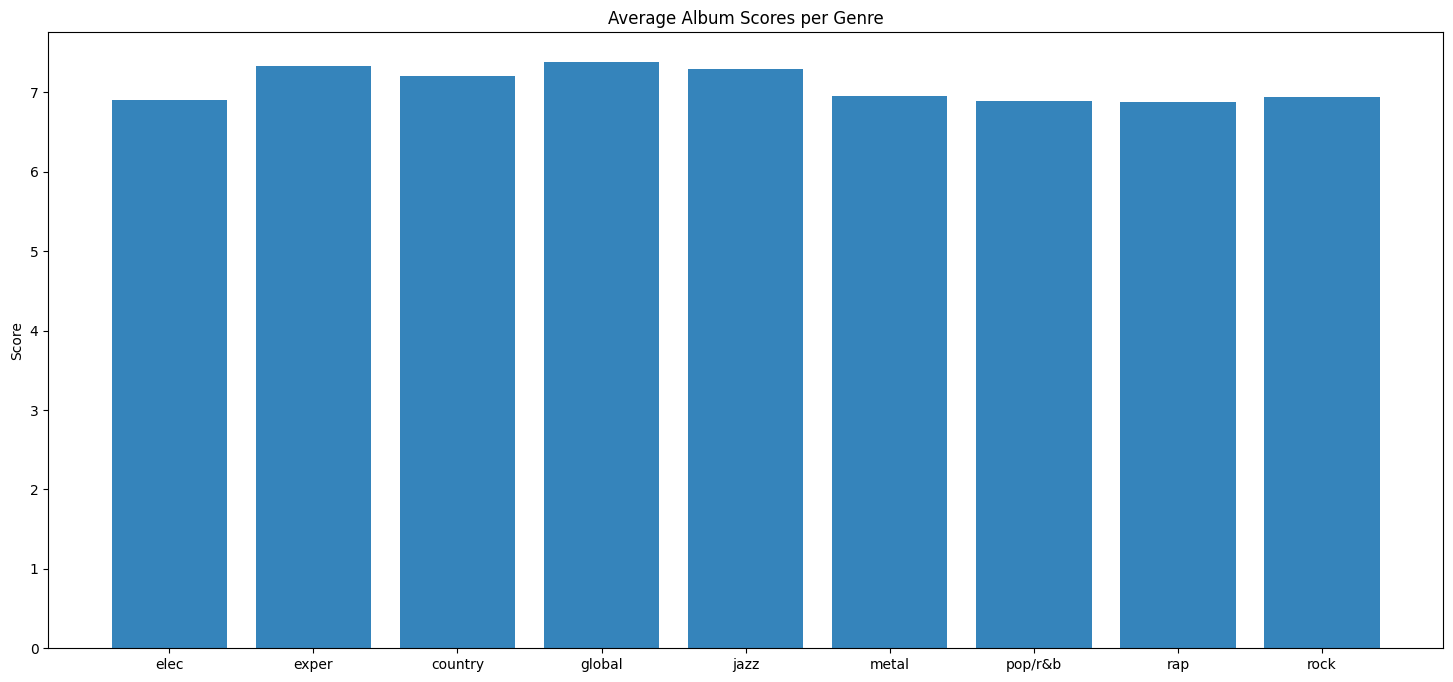

In [45]:
#Plotting a bar graph from list of averages with list of genres (in the correct order)

genretypes = ('elec', 'exper','country','global' , 'jazz', 'metal', 'pop/r&b', 'rap','rock') 
y_pos = np.arange(len(genretypes))
Averages = [6.909, 7.334, 7.206,7.387,7.292,6.957,6.894,6.882,6.942]

plt.bar(y_pos, Averages, align='center', alpha=0.9)
plt.xticks(y_pos, genretypes)
plt.ylabel('Score')
plt.title('Average Album Scores per Genre')

plt.show()

###Average Album Scores per Weekday

In [46]:
#Displays mean of album scores per weekday
Weekday_Score = pd.read_sql_query(''' SELECT pub_weekday, Score from reviews ''', data)
Weekday_Score.groupby('pub_weekday').mean()
#0=Monday, 6=Sunday

,score
pub_weekday,
friday,7.043957
monday,7.025625
saturday,7.252571
sunday,7.003376
thursday,6.990421
tuesday,7.005702
wednesday,6.963324


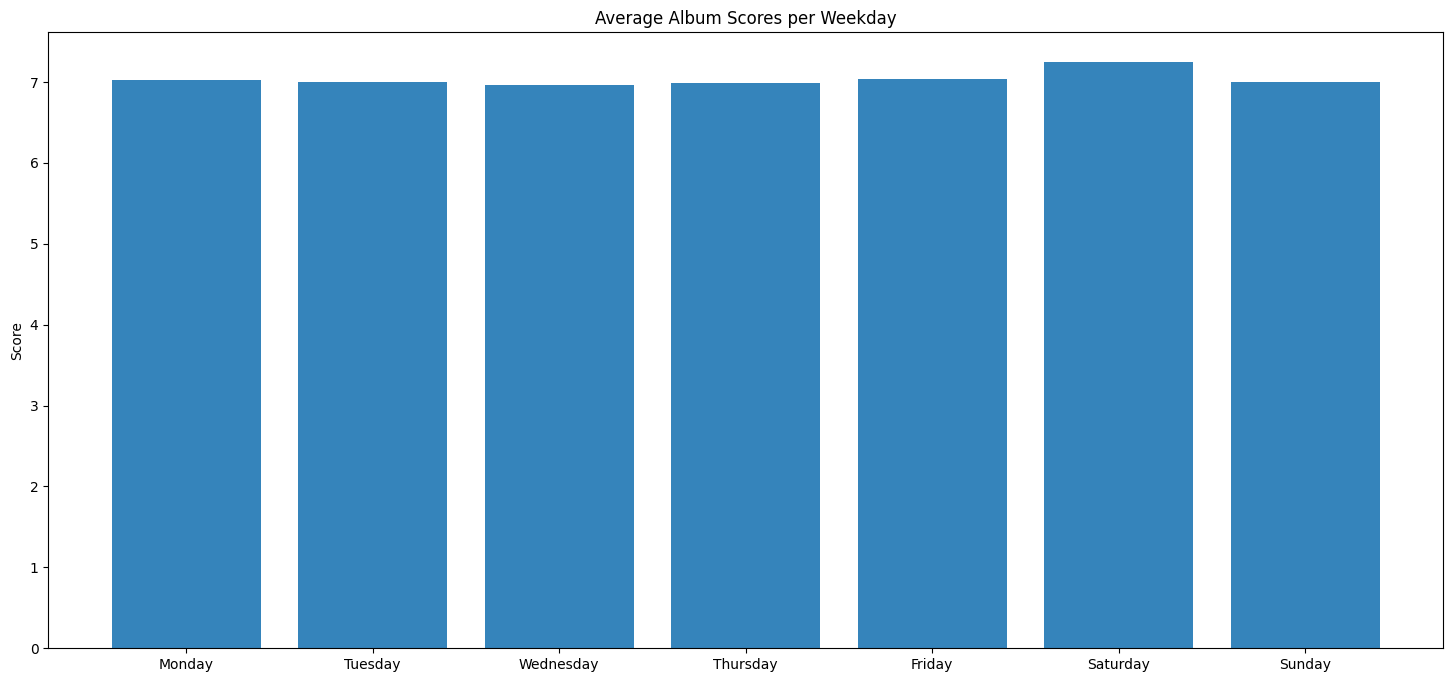

In [47]:
#Plotting a bar graph of the list of averages with the list of weekdays (in the right order)
weekdays = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
y_pos = np.arange(len(weekdays))
Averages = [7.025,7.005,6.963,6.990,7.043,7.252,7.003]

plt.bar(y_pos, Averages, align='center', alpha=0.9)
plt.xticks(y_pos, weekdays)
plt.ylabel('Score')
plt.title('Average Album Scores per Weekday')

plt.show()

###Average Album Scores per Month

In [48]:
#Function which takes the publication date (Ex: '2017-01-08'), identifies the month (01) and averages the scores for that month
def month_score_list(bit):
  review_data = data.execute(''' SELECT Score, pub_date from reviews ''')
  #score list is appended inside for loops
  score_list = []
  for row in review_data:
      month = str(row)[-7:-5]
      score = str(row)[1:4]
      if month == bit:
        # if score == "10." is for special cases in which '10.' is displayed instead of a typical score like '2.3'
        if score == "10.":
          score = str(row)[1:5]
        score_list.append(float(score))
  mean = statistics.mean(score_list)
  #returns the mean for that month, rounded
  return round(mean, 3)

month_number = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
avg_list = []
#loop which iterates through every month, eventually printing the average for each month
for x in month_number:
  avg = month_score_list(x)
  avg_list.append(avg)
print(avg_list)

[7.009, 6.985, 6.982, 6.943, 7.035, 6.97, 6.955, 6.974, 7.035, 7.085, 7.044, 7.08]


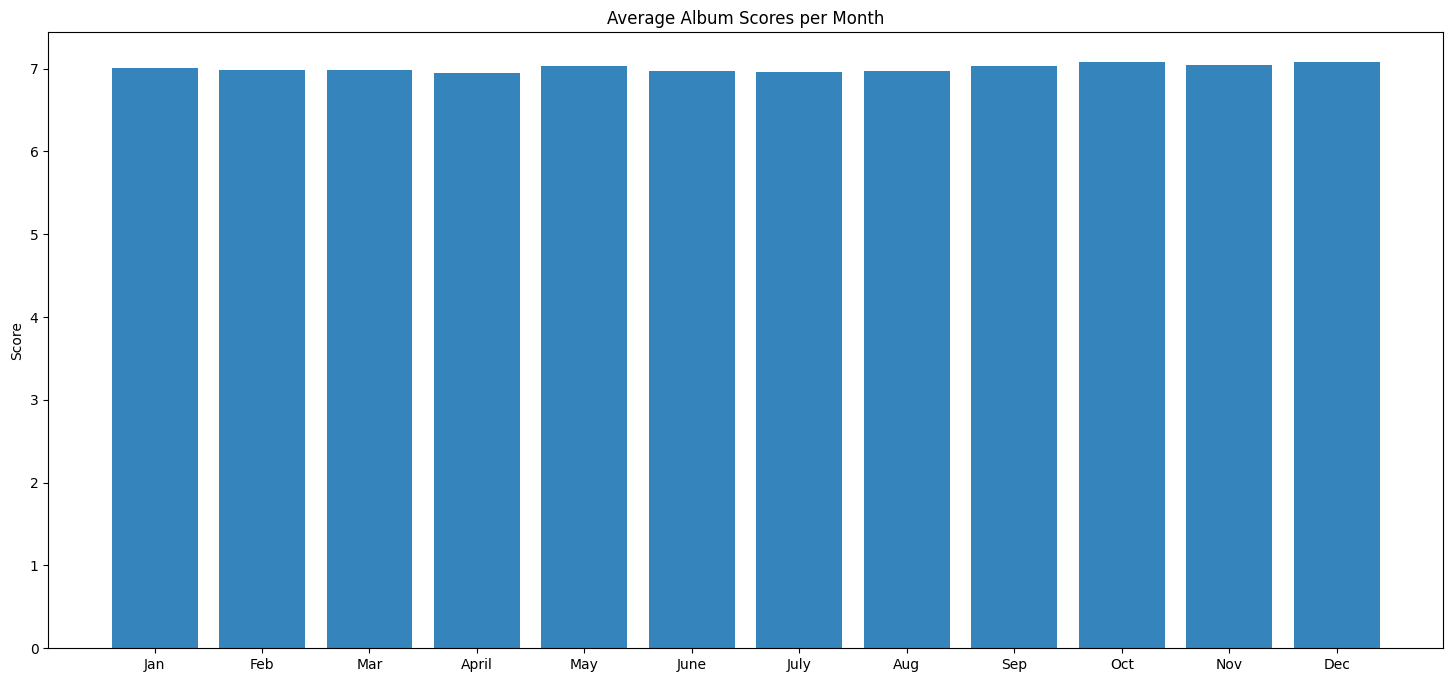

In [49]:
#Plotting a bar chart of the average album score for each month
Months = ('Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec')
y_pos = np.arange(len(Months))

plt.bar(y_pos, avg_list, align='center', alpha=0.9)
plt.xticks(y_pos, Months)
plt.ylabel('Score')
plt.title('Average Album Scores per Month')

plt.show()

###Average Album Scores per year

This first code block was our attempt at manually writing code to print the average score for each year

In [50]:
row_data = [{'date': d, 'score': x} for (d,x) in zip(data.execute(''' SELECT pub_year from reviews '''),data.execute(''' SELECT Score from reviews '''))]
#row_data = data.execute(''' SELECT Score from reviews ''')

years = [a['date'] for a in row_data if a['date'] != (2017,)]
year = set((years))
print(year)
averages = []
for y in year:
  DD = [count for count, a in enumerate(row_data) if a['date'] == y]
  #print(DD)
  SS = []
  total = 0.0
  #print(row_data[0]['score'][0])
  for i in DD:
    total += row_data[i]['score'][0]
    SS.append(row_data[i]['score'][0])
    #print(total)
  #print(SS)
  if (len(DD) != 0):
    average = total/len(DD)
  #print(average)
  averages.append(average)
print(averages)

{(2008,), (2005,), (2011,), (2001,), (2014,), (2004,), (2010,), (2007,), (2013,), (2003,), (2016,), (2000,), (2006,), (2009,), (2015,), (1999,), (2012,), (2002,)}
[6.8801831806827645, 7.0459527824620585, 7.037339055793991, 7.132675438596492, 7.082013769363174, 7.195628902765389, 6.972649572649578, 6.884621710526311, 7.050166666666663, 6.940660377358489, 7.246086956521737, 6.791954022988507, 6.979058031959627, 6.820666097352675, 7.106519823788545, 6.869506726457398, 7.012067510548523, 6.822101841820152]


After making the function above, we realized that we could also use '.groupby' to display our results, which outputs more accurate numbers

In [51]:
# This prints out stastics about the score for each year, as well as the score count.
year_totals = dataframe.groupby(['Year'])
year_totals.describe()

Score                                                  
       count      mean       std  min    25%  50%    75%   max
Year                                                          
1999   344.0  6.779360  1.786150  0.2  5.700  7.1  8.000  10.0
2000   497.0  6.828169  1.760502  0.0  6.100  7.3  7.900  10.0
2001   621.0  7.087762  1.573883  0.4  6.300  7.5  8.100  10.0
2002  1251.0  6.841727  1.619749  0.1  6.100  7.2  8.000  10.0
2003  1449.0  6.931401  1.585636  0.0  6.300  7.3  8.000  10.0
2004  1526.0  7.171166  1.324828  0.0  6.800  7.4  8.000  10.0
2005  1627.0  7.067486  1.340877  0.0  6.600  7.3  7.900  10.0
2006  1701.0  6.966902  1.296327  0.0  6.400  7.2  7.800  10.0
2007  1714.0  6.866861  1.411862  0.0  6.200  7.2  7.800  10.0
2008  1680.0  6.904167  1.361749  0.2  6.200  7.2  7.800  10.0
2009  1585.0  6.777981  1.397924  0.2  6.100  7.0  7.700  10.0
2010  1687.0  6.949970  1.262522  1.5  6.300  7.2  7.800  10.0
2011  1712.0  6.982477  1.220800  1.0  6.300  7.2  7.800  10.0
2012  1575.0  6.980635  1.153251  1.8  6.400  7.1  7.800  10.0
2013  1546.0  7.015718  1.023064  1.0  6.400  7.1  7.700  10.0
2014  1505.0  7.078272  1.050107  2.0  6.500  7.3  7.800  10.0
2015  1313.0  7.115918  0.971483  2.0  6.700  7.2  7.700  10.0
2016  1556.0  7.235090  1.059195  2.0  6.700  7.3  7.900  10.0
2017    20.0  7.250000  1.567600  3.5  7.075  7.4  8.025   9.3

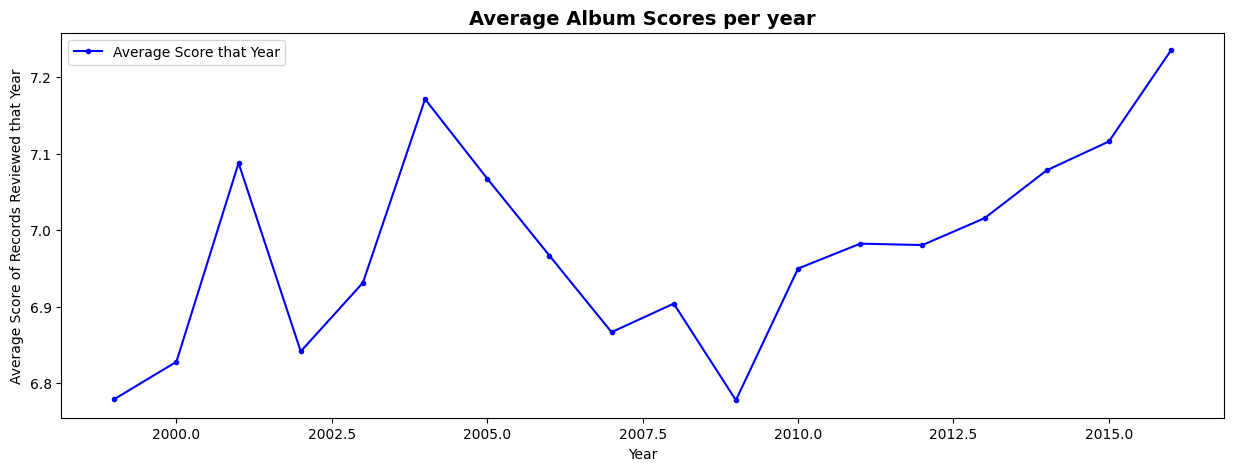

In [52]:
#Plotting a line graph of the average album scores per year
Years = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
yearscores = [6.779360,6.828169,7.087762,6.841727,6.931401,7.171166,7.067486,6.966902,6.866861,	6.904167,6.777981,	6.949970,	6.982477,	6.980635,7.015718,7.078272,7.115918,	7.235090]
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5))

plt.title('Average Album Scores per year', fontdict={'fontweight':'bold', 'fontsize': 14})

plt.plot(Years, yearscores,'b.-', label='Average Score that Year')


plt.xlabel('Year')
plt.ylabel('Average Score of Records Reviewed that Year')

plt.legend()

plt.show()

###Average Album Scores per Year for Each Genre

In [53]:
#function which takes a year as input, and outputs the average score for that year in a certain genre.
def make_table(year):
    #my_table is a query string which is then used in year_avg_score
    my_table = '''
SELECT pub_year, genre, score
FROM reviews  a
JOIN genres   b
on (a.reviewid = b.reviewid)
JOIN labels   l
on (a.reviewid = l.reviewid) WHERE pub_year=''' + year + ''' and genre='experimental';
'''
    year_score_genre = pd.read_sql_query(my_table, data)
    return year_score_genre

years = ["1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"]
all_values = []
#loop which iterates through each year and adds all averages of scores from make_table
for year in years:
  all_values.append(make_table(year).mean().values.tolist()[1])
  
print(all_values)

<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_values.append(make_table(year).mean().values.tolist()[1])
<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_values.append(make_table(year).mean().values.tolist()[1])
<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid column

[6.584375, 7.09375, 7.713333333333335, 7.46701030927835, 7.45, 7.5874999999999995, 7.234751773049646, 7.306206896551725, 7.333082706766917, 7.285271317829457, 6.9935779816513755, 7.2063492063492065, 7.304225352112675, 7.399115044247788, 7.206930693069308, 7.358064516129031, 7.539534883720929, 7.4633802816901404]


<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_values.append(make_table(year).mean().values.tolist()[1])
<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_values.append(make_table(year).mean().values.tolist()[1])
<ipython-input-53-f5a301ce8827>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid column

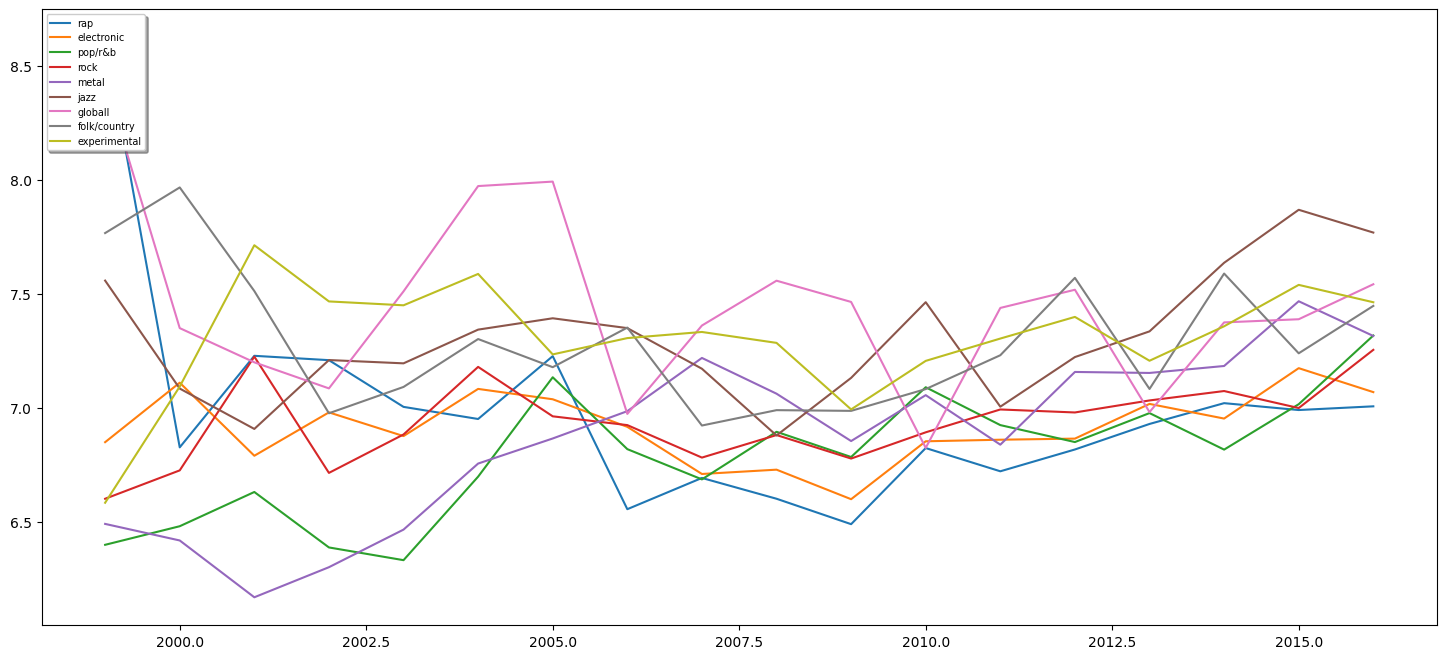

In [54]:
#Plotting a line graph of the average scores per year for each genre list
years = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
rap = [8.625, 6.827272727272728, 7.228571428571428, 7.209523809523809, 7.004705882352941, 6.95157894736842, 7.227102803738316, 6.556179775280899, 6.693103448275862, 6.601960784313725, 6.490526315789474, 6.824166666666668, 6.72230215827338, 6.817919075144507, 6.929824561403507, 7.021008403361346, 6.990862944162431, 7.00711111111111]
electronic = [6.850000000000002, 7.11075268817204, 6.790434782608698, 6.980582524271845, 6.87667844522968, 7.083467741935481, 7.0380769230769245, 6.917175572519084, 6.7105263157894735, 6.729435483870966, 6.600000000000005, 6.853821656050955, 6.860734463276838, 6.865555555555559, 7.0177419354838735, 6.953488372093025, 7.174429223744294, 7.069402985074629]
pop_rb = [6.4, 6.481481481481483, 6.631578947368422, 6.38846153846154, 6.332692307692307, 6.698837209302327, 7.134482758620693, 6.819417475728157, 6.6868686868686895, 6.895454545454545, 6.784955752212391, 7.0907692307692285, 6.924812030075183, 6.850485436893208, 6.977450980392156, 6.81734693877551, 7.016406249999999, 7.317543859649119]
rock = [6.601923076923076, 6.726294820717129, 7.225081433224751, 6.71527001862198, 6.8837837837837865, 7.180030030030035, 6.963292847503383, 6.924769433465079, 6.78241206030151, 6.881225554106908, 6.778133333333333, 6.893184979137696, 6.993314763231196, 6.980210157618219, 7.032892249527419, 7.074152542372882, 6.999600798403192, 7.25475206611571]
metal = [6.491666666666668, 6.419047619047617, 6.170000000000001, 6.301851851851854, 6.466666666666668, 6.756249999999998, 6.866153846153847, 6.985915492957746, 7.2192307692307685, 7.062499999999999, 6.854901960784314, 7.0561403508771905, 6.839024390243902, 7.157812499999996, 7.153448275862068, 7.1839285714285674, 7.46774193548387, 7.31551724137931]
jazz = [7.5583333333333345, 7.085000000000001, 6.9079999999999995, 7.210000000000001, 7.195555555555556, 7.343396226415095, 7.3931034482758635, 7.3500000000000005, 7.171875, 6.879411764705882, 7.131818181818181, 7.463636363636365, 7.005555555555556, 7.223076923076923, 7.335714285714287, 7.636363636363635, 7.86875, 7.768888888888888]
globall = [8.433333333333334, 7.3500000000000005, 7.199999999999999, 7.085714285714287, 7.51111111111111, 7.972727272727272, 7.9923076923076914, 6.97391304347826, 7.361290322580647, 7.5578947368421066, 7.464705882352941, 6.824999999999998, 7.438461538461539, 7.5181818181818185, 6.9818181818181815, 7.375, 7.388888888888889, 7.542307692307693]
folk_country = [7.766666666666667, 7.966666666666666, 7.512500000000001, 6.9766666666666675, 7.092105263157893, 7.302083333333332, 7.178723404255319, 7.352307692307692, 6.922972972972972, 6.990322580645163, 6.987234042553189, 7.082692307692306, 7.231111111111112, 7.5703703703703695, 7.083333333333332, 7.58918918918919, 7.239583333333332, 7.447368421052631]
experimental = [6.5843750000000005, 7.093750000000002, 7.713333333333335, 7.4670103092783515, 7.4499999999999975, 7.587500000000001, 7.234751773049647, 7.306206896551727, 7.333082706766919, 7.285271317829453, 6.993577981651376, 7.206349206349205, 7.304225352112678, 7.399115044247787, 7.206930693069307, 7.358064516129033, 7.53953488372093, 7.463380281690144]

plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
ax.plot(years, rap, label='rap')
ax.plot(years, electronic, label='electronic')
ax.plot(years, pop_rb, label='pop/r&b')
ax.plot(years, rock, label='rock')
ax.plot(years, metal, label='metal')
ax.plot(years, jazz, label='jazz')
ax.plot(years, globall, label='globall')
ax.plot(years, folk_country, label='folk/country')
ax.plot(years, experimental, label='experimental')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-small')

###Album Score Frequency

(0.0, 1220.0)

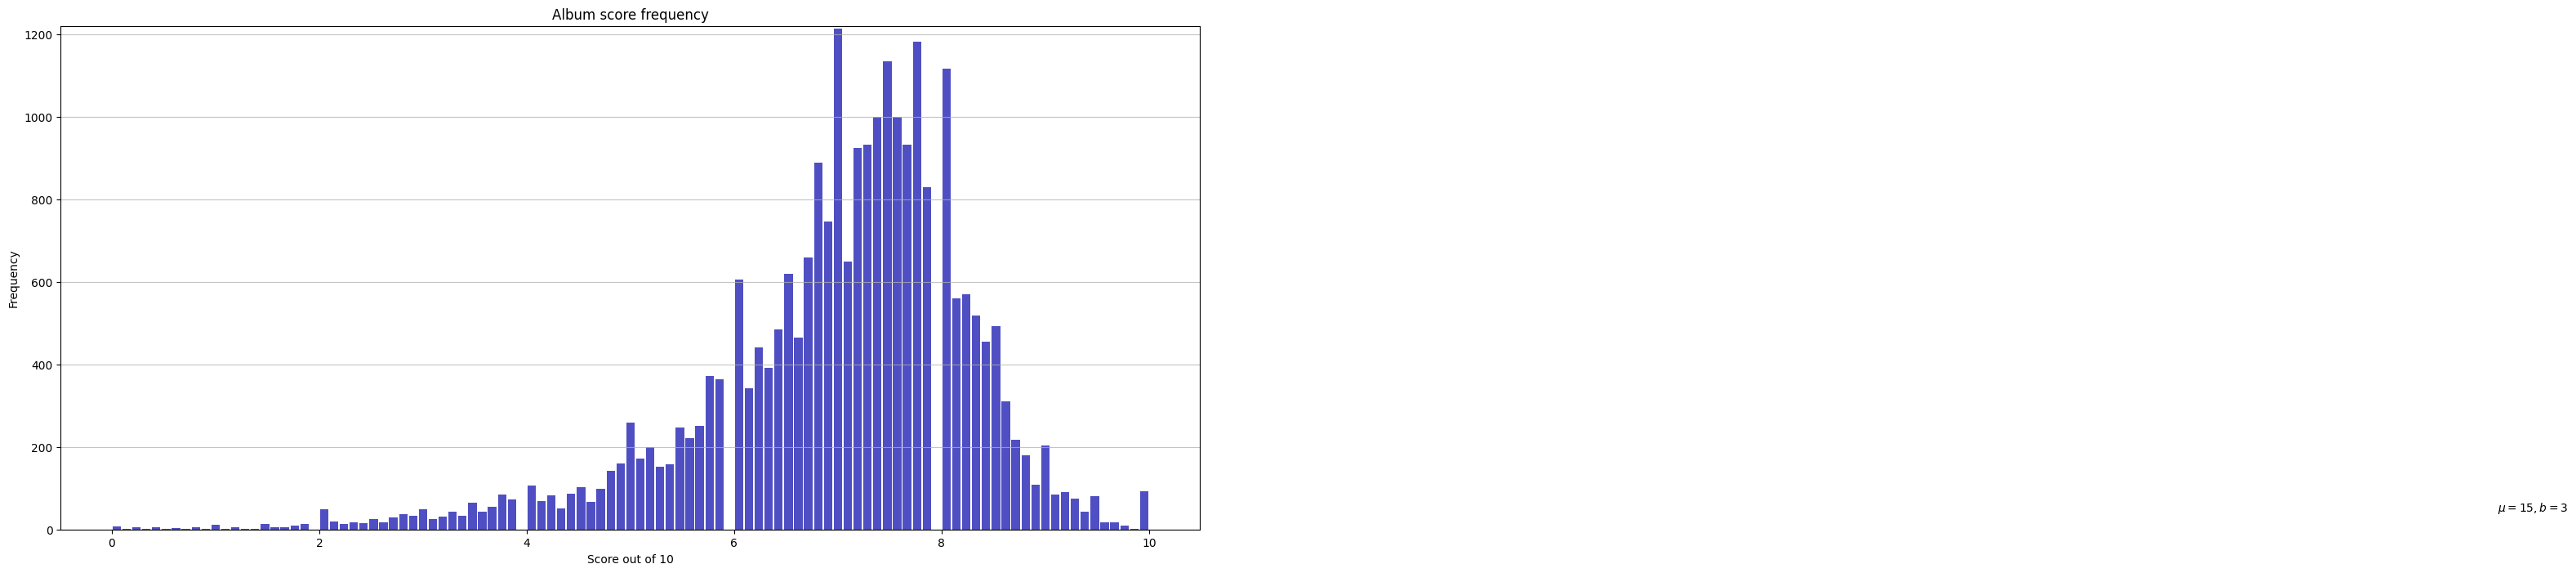

In [55]:
#Plots frequency of scores based on sorting by score (dataframe['Score'])
n, bins, patches = plt.hist(x=dataframe["Score"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Score out of 10')
plt.ylabel('Frequency')
plt.title('Album score frequency')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Upper y-axis limit
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

###Mean, Median and Mode of all time Scores

In [56]:
# Mean, median, and mode scores of all time
print(statistics.mean(dataframe["Score"]))
print(statistics.median(dataframe["Score"]))
print(statistics.mode(dataframe["Score"]))
print(statistics.stdev(dataframe["Score"]))

6.987538640651973
7.2
7.0
1.3165328983404911


##Graphs from a smaller dataset of Joe Tangari's reviews
Most prolific reviewer (4% of total reviews)


In [57]:
#sql query returning the average score for each genre of joe's reviews
pd.read_sql_query('''
SELECT
    score as Score,
    g.genre as Genre,
    author as author
FROM reviews  a
JOIN genres   g
on (a.reviewid = g.reviewid)
JOIN labels   b
on (a.reviewid = b.reviewid) where author='joe tangari';
''', data).groupby('Genre').mean()

<ipython-input-57-7ac74acf3e66>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.read_sql_query('''


,Score
Genre,
electronic,7.290123
experimental,7.403226
folk/country,7.463415
global,7.680882
jazz,7.665625
metal,6.868750
pop/r&b,7.462025
rap,7.788889
rock,7.247259


Text(0.5, 1.0, 'Average Album Scores per Genre from Joe')

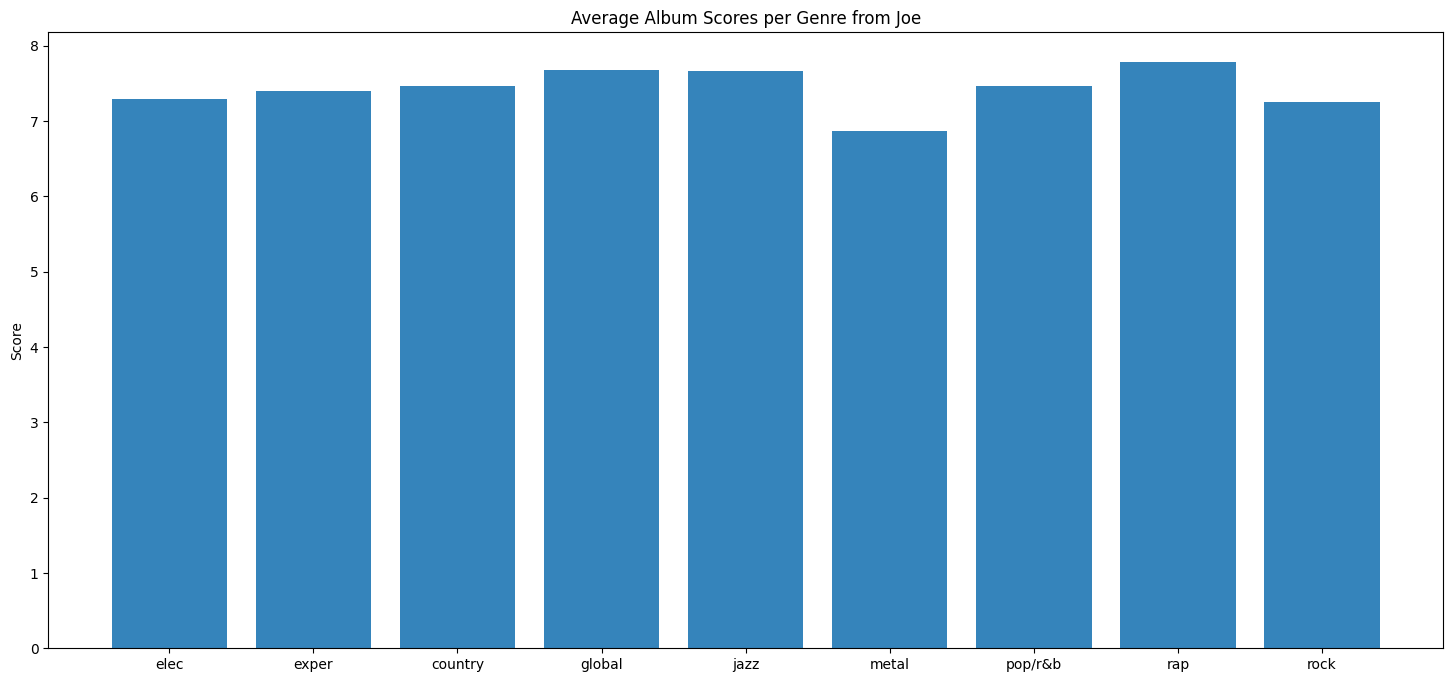

In [58]:
#Plotting a bar graph from list of Joe's averages with list of genres (in the correct order)
genretypes = ('elec', 'exper','country','global' , 'jazz', 'metal', 'pop/r&b', 'rap','rock') 
y_pos = np.arange(len(genretypes))
Averages = [7.290, 7.403, 7.463,7.680,7.665,	6.868,7.462,7.788,7.247]

plt.bar(y_pos, Averages, align='center', alpha=0.9)
plt.xticks(y_pos, genretypes)
plt.ylabel('Score')
plt.title('Average Album Scores per Genre from Joe')


###Average album Score per Year from Joe

In [59]:
#Query to find average album score per year from exclusively joe's reviews
pd.read_sql_query('''
SELECT
    pub_year as Year,
    score as Score,
    g.genre as Genre,
    author as author
FROM reviews  a
JOIN genres   g
on (a.reviewid = g.reviewid)
JOIN labels   b
on (a.reviewid = b.reviewid) where author='joe tangari';
''', data).groupby('Year').mean()

<ipython-input-59-5cd0ae28422e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.read_sql_query('''


,Score
Year,
2001,6.882759
2002,7.130208
2003,7.273404
2004,7.498519
2005,7.565487
2006,7.478512
2007,7.283333
2008,7.460550
2009,7.461333


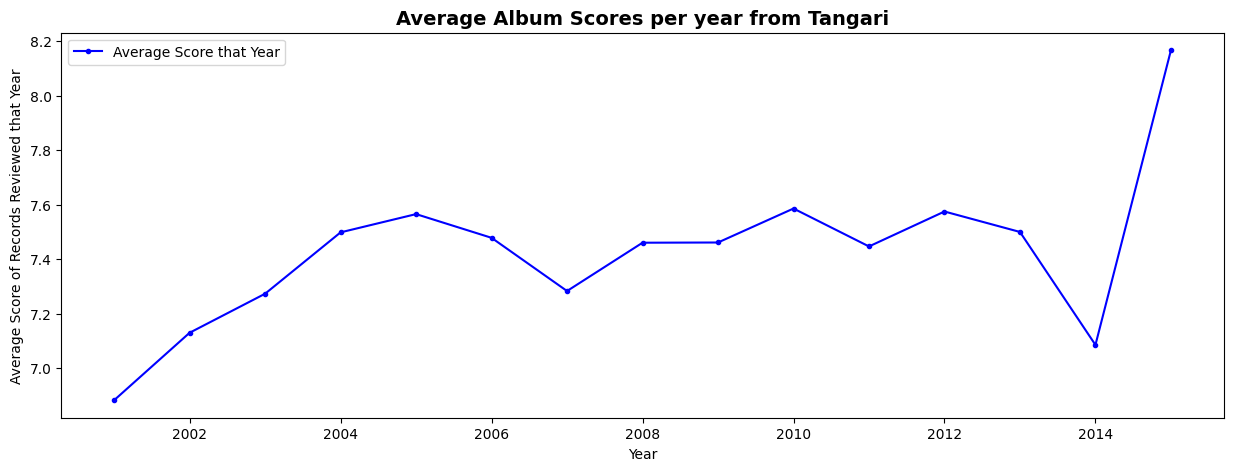

In [60]:
#Plotting a line graph of the average album scores per year
Years = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
yearscores = [6.882759, 7.130208, 7.273404, 7.498519, 7.565487, 7.478512, 7.283333, 7.460550, 7.461333, 7.585938, 7.446875, 7.575000, 7.500000, 7.085714, 8.166667]
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5))

plt.title('Average Album Scores per year from Tangari', fontdict={'fontweight':'bold', 'fontsize': 14})
plt.plot(Years, yearscores,'b.-', label='Average Score that Year')


plt.xlabel('Year')
plt.ylabel('Average Score of Records Reviewed that Year')

plt.legend()
plt.show()

#Main - Score predictor function


In [ ]:
#main
#This will be the interface for a user who would wish to querie specific information from our Score Predictor function
#Or run what if scenarios about new songs/albums entering the market under specific criteria
print("Hello World")
print("Initializing base functions")
print("... \n... \n...")
user = input("Hello, user please enter name here: ")
print("Goodmorning, " + user + ".")
Database = None
while(Database == None):
  #test whether file can be found and used if not set Database to None and ask again (giving feedback for invalid input and feedback for a valid input)
  print('EX: /content/drive/MyDrive/Pitchfork/database.sqlite')
  Database = input("What data base will we be using today: ")
  try:
    Data = open(str(Database))
  except OSError as e:
    print("Error 404\nFile:" + str(Database) + " not found\n\nPlease Try Again...")
    Database = None

#create a data table from the file provided to be used for our song record object
data = sqlite3.connect(str(Database))
cur = data.cursor()
Database = Decode(data)

#create our song record opject
Records = song_record(Database)

#early debugging
#print("functions")

#spacing
print()

#Move the user to the main menu now that the data and the username is set
Menu()

Hello World
Initializing base functions
... 
... 
...


In [ ]:
#Closes the database so it doesn't lock
cur.close()
data.close()



```
# This is formatted as code
```

#Conclusions / Value Created





***How* did we predict how an upcoming or established artist will achieve on pitchfork, and biases do reviewers have?**
  
>For our findings on bias, we thoroughly examined our data through data cleansing, and created distinct variables by which reviewers could have bias (Artist, Genre, Weekday, Month, Year, etc). We analysed simple totals from these categories to find potential bias. Our visualization of findings was simplified to several simple bar charts, line graphs, histograms, etc.

>For our prediction function we decided to go the route of regression testing for variables found in our dataset (Ex: Year, Day, Artist, Genre, and Label). A true regression test was not possible due to too many dummy variables. A simplified form was used to get an accurate score.





**What variables are the top predictors of album scores?**


> - Top predictor of album scores: Artist name
- Genre is second key indicator of score
- 'Global' genre has highest average score
- Saturday reviews have highest average score
- Month has no substantial effect on average scores
- Average scores rose 0.5 points from 2009 to 2016
- Metal and Pop genres increased ratings over time
- Less variance in average genre scores in 2016 than in 1999
- Mean album score: 6.987; Median: 7.2; Mode: 7.0; Standard deviation: 1.32

**What are Pitchfork's potential biases in scoring?**
> - Bias towards 'global' genre
- Bias towards reviews published Saturday
- Bias towards scores published in more recent years
- Growing bias towards metal and pop genre ratings
- More uniform scoring ratings in recent years


**Does Pitchfork's most prolific reviewer show biases in scoring?**


> Yes, Joe Tangari (4% of all Pitchfork reviews) has favorite genres. Rap scored 0.92 points higher than metal on average, which is a significant bias. It appears he also has changed his average review score over the years with a lot of variation. His lowest score year (2001) was nearly two points lower than his highest average score year (2015).


**Is our score predictor function worthwhile?**

> We would say that our Predictor function is worthwhile, as while it is fairly accurate to the actual scores within the dataset it also maintains a more conservative prediction typically staying around the overall datasets average (unless the variables given are worse than the average).

> 
**What are some caviats to our analysis/things to improve on?**

> **Extrapolation:** A significant limitation is the inability to predict results for variables outside our dataset, such as years before 1999 or after 2017, new artists, and unlisted genres. Further analysis or incorporation of other studies is necessary to address this lack of information.

> **Regression accuracy** Another significant limitation is the lack of knowledge or computational power to efficiently run a thorough regression analysis. We have reached a cap in our ability to perform accurate computations.

> **Label accuracy:** As of the release of this project, we have slight inaccuracies in label displays. One of our over time graphs in which lists half years such as 2007.5 instead of every whole year.



**What value can this bring?**
>  By identifying and understanding potential biases, reviewers can work to minimize their impact and provide more objective and fair evaluations. This can help music listeners and musicians understand the credibility of reviewers as well so they can make more informed decisions. Additionally, our hypothetical scoring tool (perhaps once more developed) could allow musicians and producers to better conceptualize how their new release may be scored by pitchfork.